### 꼬꼬마 형태소 분석기 사용

- 가상환경은 base로 구성
- 향후 프로젝트때 세팅에 시간이 많이 소요되는 부분은 고려하여 base로 구성

In [120]:
# 1. 형태소 모듈 가져오기
from konlpy.tag import Kkma

In [121]:
# 2. 형태소 객체 생성
kkma = Kkma()

In [122]:
# 3. 문장이라는 재료가 필요하다
# 문장 <- 재료(텍스트)
test_text = '''
우리은행과 KEB하나은행이 판매한 7천억원대의 해외 금리 연계 파생결합펀드(DLF)의 
대규모 손실 우려가 커진 가운데 주요 은행 중 신한은행과 NH농협은행이 
이번 사태에서 비껴나 있어서 눈길을 끈다

신한은행은 이 상품의 높은 리스크를 감지하고 판매를 중단한 것으로 나타났다
농협은행은 운용사로부터 판매 제안을 받았지만 높은 리스크를 우려해 아예 판매하지 않았다
'''  # 뉴스의 아무 문장이나 가져오기

In [123]:
# 4. 함수들을 적용하면서 텍스트를 분해해 보기 (두번째 문장 수정부터는 처리속도가 빨라졌다-자라의 처리과정과 비슷하다)
kkma.sentences( test_text )

['우리은행과 KEB 하나은행이 판매한 7천억원 대의 해외 금리 연계 파생 결합 펀드 (DLF) 의 대규모 손실 우려가 커진 가운데 주요 은행 중 신한 은행과 NH 농협은행이 이번 사태에서 비껴 나 있어서 눈길을 끈다 신한 은행은 이 상품의 높은 리스크를 감지하고 판매를 중단한 것으로 나타났다 농협은행은 운 용사로부터 판매 제안을 받았지만 높은 리스크를 우려해 아예 판매하지 않았다']

In [124]:
test_text = '''
우리은행과 KEB하나은행이 판매한 7천억원대의 해외 금리 연계 파생결합펀드(DLF)의 
대규모 손실 우려가 커진 가운데 주요 은행 중 신한은행과 NH농협은행이 
이번 사태에서 비껴나 있어서 눈길을 끈다.

신한은행은 이 상품의 높은 리스크를 감지하고 판매를 중단한 것으로 나타났다.
농협은행은 운용사로부터 판매 제안을 받았지만 높은 리스크를 우려해 아예 판매하지 않았다.
''' 

In [125]:
# 마침표를 기준점으로 문장의 끝을 판별한다 
# -> 실제 리얼 데이터들은 마침표가 없을 가능성이 크다
# 문장의 분해라는 관점에서는 부적절함이 보인다
tmp = kkma.sentences( test_text )
tmp

['우리은행과 KEB 하나은행이 판매한 7천억원 대의 해외 금리 연계 파생 결합 펀드 (DLF) 의 대규모 손실 우려가 커진 가운데 주요 은행 중 신한 은행과 NH 농협은행이 이번 사태에서 비껴 나 있어서 눈길을 끈다.',
 '신한 은행은 이 상품의 높은 리스크를 감지하고 판매를 중단한 것으로 나타났다.',
 '농협은행은 운 용사로부터 판매 제안을 받았지만 높은 리스크를 우려해 아예 판매하지 않았다.']

In [126]:
len( tmp ) # 문장은 2개

3

In [127]:
for sen in tmp:
    print("-"*10) # 구분자 : -------------
    # 명사 추출
    word = kkma.nouns( sen )
    # 형태소 분석
    poses = kkma.pos( sen ) # 품사를 표시하고 있지만 용어의 정리를 통해서 정확히 무엇을 의미하는지 알아야한다
    morphses = kkma.morphs( sen ) # 이 녀석은 그냥 쪼개기만 한다
    print( sen, word, poses, morphses ) 
    print("-"*10)

----------
우리은행과 KEB 하나은행이 판매한 7천억원 대의 해외 금리 연계 파생 결합 펀드 (DLF) 의 대규모 손실 우려가 커진 가운데 주요 은행 중 신한 은행과 NH 농협은행이 이번 사태에서 비껴 나 있어서 눈길을 끈다. ['우리', '우리은행', '은행', '하나', '하나은행', '판매', '7', '7천억원', '천', '억', '원', '대', '해외', '금리', '연계', '파생', '결합', '펀드', '의', '대규모', '손실', '우려', '가운데', '주요', '중', '신한', '농협', '농협은행', '이번', '사태', '나', '눈길'] [('우리은행', 'NNG'), ('과', 'JC'), ('KEB', 'OL'), ('하나', 'NNG'), ('은행', 'NNG'), ('이', 'JKS'), ('판매', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('7', 'NR'), ('천', 'NR'), ('억', 'NR'), ('원', 'NNM'), ('대', 'NNG'), ('의', 'JKG'), ('해외', 'NNG'), ('금리', 'NNG'), ('연계', 'NNG'), ('파생', 'NNG'), ('결합', 'NNG'), ('펀드', 'NNG'), ('(', 'SS'), ('DLF', 'OL'), (')', 'SS'), ('의', 'NNG'), ('대규모', 'NNG'), ('손실', 'NNG'), ('우려', 'NNG'), ('가', 'JKS'), ('커지', 'VV'), ('ㄴ', 'ETD'), ('가운데', 'NNG'), ('주요', 'NNG'), ('은행', 'NNG'), ('중', 'NNB'), ('신한', 'NNP'), ('은행', 'NNG'), ('과', 'JC'), ('NH', 'OL'), ('농협', 'NNG'), ('은행', 'NNG'), ('이', 'JKS'), ('이번', 'NNG'), ('사태', 'NNG'), ('에서', 'JKM'), ('비끼', 'VV'), ('어', 

### 한나눔

In [128]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
# test_text 사용할 것

In [129]:
# pos 분석을 진행하여 계층 구조 정립
hannanum.analyze( test_text )

[[[('우리', 'ncn'), ('은행과', 'ncn')],
  [('우리', 'ncn'), ('은행', 'ncn'), ('과', 'jcj')],
  [('우리', 'ncn'), ('은행', 'ncn'), ('과', 'jct')],
  [('우리', 'ncn'), ('은행', 'ncn'), ('과', 'ncn')]],
 [[('KEB하나은행', 'ncn'), ('이', 'jcc')],
  [('KEB하나은행', 'ncn'), ('이', 'jcs')],
  [('KEB하나은행이', 'ncn')],
  [('KEB하나은행', 'nqq'), ('이', 'jcc')],
  [('KEB하나은행', 'nqq'), ('이', 'jcs')],
  [('KEB하나은행이', 'nqq')]],
 [[('판매', 'ncpa'), ('한', 'ncn')],
  [('판매', 'ncpa'), ('하', 'xsva'), ('ㄴ', 'etm')]],
 [[('7', 'nnc'),
   ('천', 'nnc'),
   ('억', 'nnc'),
   ('원', 'nbu'),
   ('대', 'xsnu'),
   ('의', 'jcm')]],
 [[('해외', 'ncn')],
  [('해', 'nbu'), ('외', 'xsnx')],
  [('해', 'ncn'), ('외', 'xsnx')]],
 [[('금리', 'ncn')]],
 [[('연계', 'ncpa')]],
 [[('파생결합펀드', 'ncn'), ('(', 'sl'), ('DLF', 'f'), (')', 'sr'), ('의', 'jcm')],
  [('파생결합펀드', 'ncn'), ('(', 'sl'), ('DLF', 'f'), (')', 'sr'), ('의', 'ncn')],
  [('파생결합펀드(DLF', 'ncn'), (')', 'sr'), ('의', 'jcm')],
  [('파생결합펀드(DLF', 'ncn'), (')', 'sr'), ('의', 'ncn')],
  [('파생결합펀드(DLF)', 'ncn'), ('의', 'jcm')

In [130]:
hannanum.nouns( test_text ) # 명사로 뽑힌다

['우리은행',
 'KEB하나은행',
 '판매',
 '7천억원',
 '해외',
 '금리',
 '연계',
 '파생결합펀드',
 '대규모',
 '손실',
 '우려',
 '가운데',
 '주요',
 '은행',
 '중',
 '신한은행',
 '농협은행',
 '이번',
 '사태',
 '눈길',
 '신한은행은',
 '상품',
 '리스크',
 '판매',
 '중단',
 '것',
 '농협은행',
 '운용사로부터',
 '판매',
 '제안',
 '리스크',
 '우',
 '판매']

In [131]:
hannanum.morphs( test_text ) # 명사대비해서 훨씬 많이 나온다

['우리은행',
 '과',
 'KEB하나은행',
 '이',
 '판매',
 '하',
 'ㄴ',
 '7천억원',
 '대',
 '의',
 '해외',
 '금리',
 '연계',
 '파생결합펀드',
 '(',
 'DLF',
 ')',
 '의',
 '대규모',
 '손실',
 '우려',
 '가',
 '크',
 '어',
 '지',
 'ㄴ',
 '가운데',
 '주요',
 '은행',
 '중',
 '신한은행',
 '과',
 'NH',
 '농협은행',
 '이',
 '이번',
 '사태',
 '에서',
 '비끼',
 '어',
 '나',
 '아',
 '있',
 '어서',
 '눈길',
 '을',
 '끌',
 'ㄴ다',
 '.',
 '신한은행은',
 '이',
 '상품',
 '의',
 '높',
 '은',
 '리스크',
 '를',
 '감',
 '지',
 '하',
 '고',
 '판매',
 '를',
 '중단',
 '하',
 'ㄴ',
 '것',
 '으로',
 '나타나',
 '아다',
 '.',
 '농협은행',
 '은',
 '운용사로부터',
 '판매',
 '제안',
 '을',
 '받',
 '아지만',
 '높',
 '은',
 '리스크',
 '를',
 '우',
 '이',
 '리어',
 '하',
 '어',
 '아예',
 '판매',
 '하',
 '지',
 '않',
 '아다',
 '.']

In [132]:
hannanum.pos( test_text )

[('우리은행', 'N'),
 ('과', 'J'),
 ('KEB하나은행', 'N'),
 ('이', 'J'),
 ('판매', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('7천억원', 'N'),
 ('대', 'X'),
 ('의', 'J'),
 ('해외', 'N'),
 ('금리', 'N'),
 ('연계', 'N'),
 ('파생결합펀드', 'N'),
 ('(', 'S'),
 ('DLF', 'F'),
 (')', 'S'),
 ('의', 'J'),
 ('대규모', 'N'),
 ('손실', 'N'),
 ('우려', 'N'),
 ('가', 'J'),
 ('크', 'P'),
 ('어', 'E'),
 ('지', 'P'),
 ('ㄴ', 'E'),
 ('가운데', 'N'),
 ('주요', 'N'),
 ('은행', 'N'),
 ('중', 'N'),
 ('신한은행', 'N'),
 ('과', 'J'),
 ('NH', 'F'),
 ('농협은행', 'N'),
 ('이', 'J'),
 ('이번', 'N'),
 ('사태', 'N'),
 ('에서', 'J'),
 ('비끼', 'P'),
 ('어', 'E'),
 ('나', 'P'),
 ('아', 'E'),
 ('있', 'P'),
 ('어서', 'E'),
 ('눈길', 'N'),
 ('을', 'J'),
 ('끌', 'P'),
 ('ㄴ다', 'E'),
 ('.', 'S'),
 ('신한은행은', 'N'),
 ('이', 'M'),
 ('상품', 'N'),
 ('의', 'J'),
 ('높', 'P'),
 ('은', 'E'),
 ('리스크', 'N'),
 ('를', 'J'),
 ('감', 'P'),
 ('지', 'E'),
 ('하', 'P'),
 ('고', 'E'),
 ('판매', 'N'),
 ('를', 'J'),
 ('중단', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('것', 'N'),
 ('으로', 'J'),
 ('나타나', 'P'),
 ('아다', 'E'),
 ('.', 'S'),
 ('농협은행', 'N'),
 ('

### 트위터

In [133]:
from konlpy.tag import Okt
from konlpy.tag import Twitter
# Twitter -> Okt

In [134]:
t = Okt()

In [135]:
# 어구 추출 : 명사보다 좀 더 큰 범위의 문장으로 나옴
t.phrases( test_text ), len(t.nouns( test_text ))

(['우리은행',
  '우리은행과 KEB하나은행',
  '판매',
  '7천억원',
  '해외',
  '해외 금리',
  '해외 금리 연계',
  '해외 금리 연계 파생결합펀드',
  'DLF',
  '의 \n대규모',
  '의 \n대규모 손실',
  '의 \n대규모 손실 우려',
  '가운데',
  '가운데 주요',
  '가운데 주요 은행',
  '가운데 주요 은행 중',
  '가운데 주요 은행 중 신한은행',
  '가운데 주요 은행 중 신한은행과 NH농협은행',
  '이번',
  '이번 사태',
  '눈길',
  '신한은행',
  '이 상품',
  '이 상품의 높은 리스크',
  '감지',
  '중단',
  '농협은행',
  '운용사로부터',
  '운용사로부터 판매',
  '운용사로부터 판매 제안',
  '높은 리스크',
  '우려',
  '아예',
  '아예 판매',
  'KEB',
  '하나은행',
  '금리',
  '연계',
  '파생',
  '결합',
  '펀드',
  '대규모',
  '손실',
  '주요',
  '은행',
  'NH',
  '농협',
  '사태',
  '상품',
  '리스크',
  '운용',
  '사로부터',
  '제안'],
 42)

In [136]:
# 명사 추출
t.nouns( test_text ), len(t.nouns( test_text ))

(['우리은행',
  '하나은행',
  '판매',
  '해외',
  '금리',
  '계',
  '파생',
  '결합',
  '펀드',
  '의',
  '대규모',
  '손실',
  '우려',
  '가운데',
  '주요',
  '은행',
  '중',
  '신한은행',
  '농협',
  '은행',
  '이번',
  '사태',
  '비',
  '눈길',
  '신한은행',
  '이',
  '상품',
  '리스크',
  '감지',
  '판매',
  '중단',
  '것',
  '농협',
  '은행',
  '운용',
  '로부터',
  '판매',
  '제안',
  '리스크',
  '우려',
  '아예',
  '판매'],
 42)

In [137]:
# 품사 처리됨
t.pos( test_text )

[('\n', 'Foreign'),
 ('우리은행', 'Noun'),
 ('과', 'Josa'),
 ('KEB', 'Alpha'),
 ('하나은행', 'Noun'),
 ('이', 'Josa'),
 ('판매', 'Noun'),
 ('한', 'Josa'),
 ('7천억원', 'Number'),
 ('대의', 'Foreign'),
 ('해외', 'Noun'),
 ('금리', 'Noun'),
 ('연', 'Modifier'),
 ('계', 'Noun'),
 ('파생', 'Noun'),
 ('결합', 'Noun'),
 ('펀드', 'Noun'),
 ('(', 'Punctuation'),
 ('DLF', 'Alpha'),
 (')', 'Punctuation'),
 ('의', 'Noun'),
 ('대규모', 'Noun'),
 ('손실', 'Noun'),
 ('우려', 'Noun'),
 ('가', 'Josa'),
 ('커진', 'Verb'),
 ('가운데', 'Noun'),
 ('주요', 'Noun'),
 ('은행', 'Noun'),
 ('중', 'Noun'),
 ('신한은행', 'Noun'),
 ('과', 'Josa'),
 ('NH', 'Alpha'),
 ('농협', 'Noun'),
 ('은행', 'Noun'),
 ('이', 'Josa'),
 ('이번', 'Noun'),
 ('사태', 'Noun'),
 ('에서', 'Josa'),
 ('비', 'Noun'),
 ('껴나', 'Verb'),
 ('있어서', 'Adjective'),
 ('눈길', 'Noun'),
 ('을', 'Josa'),
 ('끈다', 'Verb'),
 ('.', 'Punctuation'),
 ('\n\n', 'Foreign'),
 ('신한은행', 'Noun'),
 ('은', 'Josa'),
 ('이', 'Noun'),
 ('상품', 'Noun'),
 ('의', 'Josa'),
 ('높은', 'Adjective'),
 ('리스크', 'Noun'),
 ('를', 'Josa'),
 ('감지', 'Noun'),


### 형태소 분석기는 트위터를 사용
- 워드클라우드를 사용하여 지문의 중요 단어들을 표시
- 이미지(해당 내용을 좀 더 부각)위에 마스킹 처리하여서 시각화
- stopword 항목을 통해서 부적절한 용어나, 제거할 단어들을 빼고 처리 
- 연관어 유사어 등등 항목들을 구성하여 표현

In [138]:
from wordcloud import WordCloud, STOPWORDS

In [139]:
import numpy as np
from PIL import Image

In [140]:
# 텍스트 파일을 부를 것이다( text_mining의 data안에 있는 파일)-> 드랍박스에 파일있으니 다운로드 받을 것
with open('./data/alice.txt') as f:
    text = f.read()
text[:100], len(text)
# 이렇게 안 쓸려면 위의 소스코드로 작성
# f = open( './data/alice.txt')
# text = f.read()
# f.close()
# text

("Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of",
 145187)

In [141]:
# 이미지 마스킹
alice_mask = np.array( Image.open( './data/alice_mask.png' ) )
alice_mask.shape

(900, 900)

In [142]:
# 시각화 준비
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
# 한글처리
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


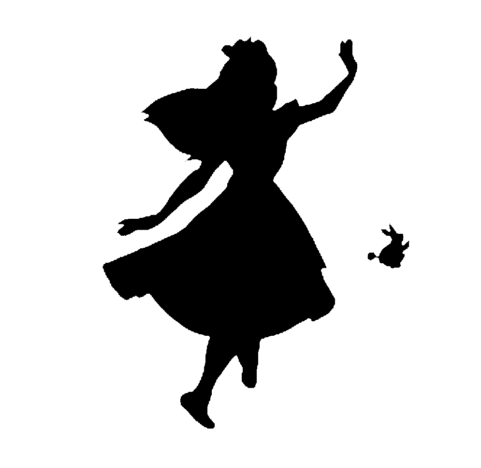

In [144]:
# 이미지 그리기
plt.figure( figsize=(8,8))
# interpolation='bilinear : 이미지를 그리는 처리에 중요한 부분
# 이중선형 보간법 설정, 1차원 선형보간법을 2차원으로 확장한다는 의미
plt.imshow( alice_mask, cmap=plt.cm.gray, interpolation='bilinear' )
# 출력은 표안에 추출된다
# 축을 제거하고 싶을때
plt.axis('off') # 알맹이만 남는다
plt.show()

In [145]:
STOPWORDS #명사가 아닌것을 모아둔 라이브러리

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [146]:
# 카운팅에 배제되는 단어
# 단어로 사용되지 않는 영어문자들을 모아둔것 : STOPWORDS
stopwords = set( STOPWORDS ) # 중복제거를 한번 실행한 것이다 (set을 통해서)
# 만약에 특정 단어를 추가하고 싶다면
stopwords.add( 'said' )
# stopwords # 딕셔너리에 키가 없는 구조다(그냥 stopwords를 쳤을 경우에 나타나는 출력값)
len(stopwords)

191

In [147]:
# 워드클라우드를 생성
# 워드 카운트 기능을 제공한다(워드클라우드의 자체 기능)
wc = WordCloud( background_color='white', 
          max_words=2000,  # max_words=단어는 몇개까지 표현할 것인가
          mask=alice_mask, # alice_mask를 사용한다는 뜻
          stopwords=stopwords ) 

In [148]:
# 위의 소스코드는 데이터를 안넣는 상태라서 여기서 데이터를 넣어준다, 위의 text 데이터를 넣어준다
# generate를 통해서 워드카운트 수행하는것
wc = wc.generate( text )

In [149]:
len(wc.words_), type(wc.words_) # 딱 결과값이 2000개가 나온다(위에서 작성된 2000개 소스코드 때문인듯)

(2000, dict)

In [150]:
wc.words_ # 통찰을 한번해보자(데이터 확인) : 최대를 1.0으로 잡고 밑에 것들을 정규화(정형화) 시킨것

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

In [ ]:
# 최대 빈도 word를 1.0으로 두고, 나머지는 0까지 정규화 하였다
wc.words_ 
'''
ouptut:
{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 ...
'''

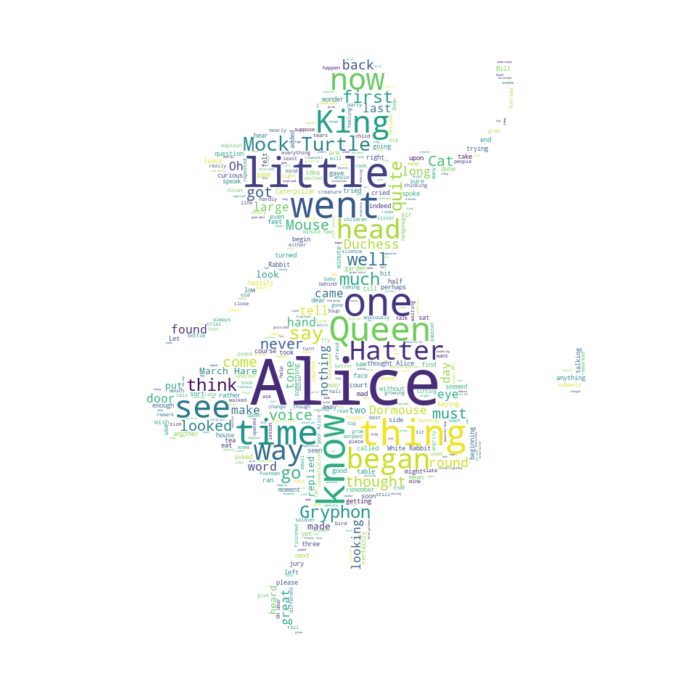

In [152]:
# 최종 시각화
plt.figure( figsize=(12,12))
plt.imshow( wc, interpolation='bilinear' )
plt.axis('off')
plt.show()

In [153]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

### 스타워즈 텍스트

In [158]:
# 텍스트 원문 -> 정제작업
with open( './data/star_wars.txt' ) as f:
    text = f.read()

In [159]:
text[:100], len(text)

('\n\n                                        STAR WARS\n\n                                        Episode',
 326361)

In [161]:
# 같은 단어(이름)인데 표현을 다양해서 다르게 인식될 수 있다
text.find('HAN'), text.find('Han') # 같은 아이들이지만 표현이 다르게 나온다

(113272, 113039)

In [162]:
text = text.replace( 'HAN', 'Han' )

In [163]:
text.find('HAN'), text.find('Han') # 한쪽으로 통합이 된 듯하다

(-1, 113039)

In [165]:
text.find( "LUKE'S" ), text.find( "Luke" )

(70466, 5405)

In [166]:
text = text.replace( "LUKE'S", "Luke" ) # LUKE'S를 Luke로 통합
# 이하 작업은 워드클라우드 시각화후 판단하여 텍스트의 내용을 조정(전처리작업)후 다시 처리
# 하는 과정을 미리 수행한 것이다.

In [168]:
# 스탑워드 -> 카운트 제거 단어 추가본
from wordcloud import STOPWORDS # 다시 떙긴다

stopwords = set( STOPWORDS )
# 추가 단어는 시각화 판단하여 추가

In [169]:
# 마스크 이미지 생성
mask_img = np.array( Image.open('./data/stormtrooper_mask.png') )
mask_img.shape

(1028, 1190)

In [170]:
# 워드 생성
wc = WordCloud( max_words=1000,  
                mask=mask_img,
                stopwords=stopwords,
                margin=10 # margin: 여백주기
               ).generate( text )  

In [172]:
# 칼라값을 활용할 수 있다(결과물인 3의 뜻)
tmp = wc.to_array()
tmp.shape  # 3차 행렬로 출력된다

(1028, 1190, 3)

In [ ]:
wc.words_ # 1.0으로 정규화가 된다
'''
'Luke': 1.0,
 'Han': 0.45904761904761904,
 'DEATH STAR': 0.4266666666666667,
 'THREEPIO': 0.37523809523809526,
 ...
'''

In [176]:
import random
def color_func( word, font_size, position, orientation, random_state=None, **kwargs ):
    return 'hsl(178, 235%%, %d%%)'% random.randint( 80, 100 ) # %: format을 쓰겠다는 뜻, %d%%: 비율을 주겠다
    

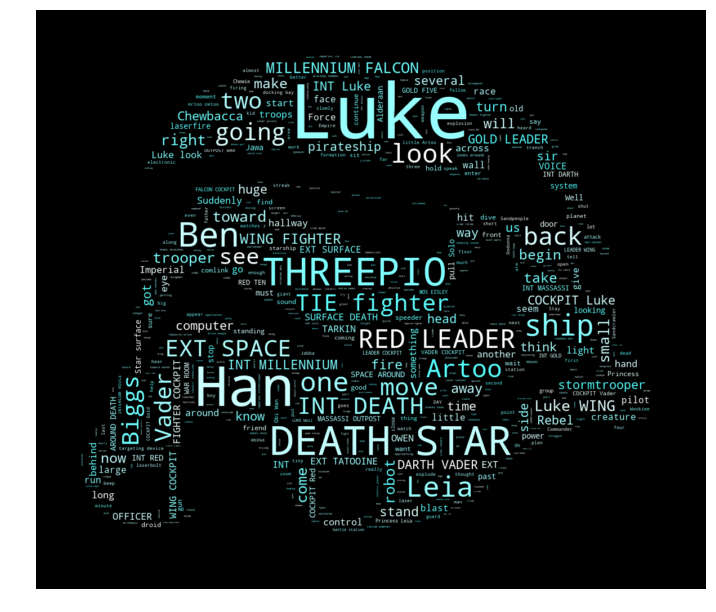

In [177]:
# 시각화
plt.figure( figsize=(12,12))
# recolor: 색상을 재구성한다
plt.imshow( wc.recolor( color_func=color_func, random_state=3 ), 
            interpolation='bilinear' )
plt.axis('off')
plt.show()

### KoNLPy를 이용한 처리
- 기본으로 제공하는 내장 법안을 기준으로 분석
- 법률 문서 분석

In [178]:
import nltk

In [179]:
from konlpy.corpus import kobill

In [180]:
kobill.fileids() # kobill의 관련 코드( 어떤 내용을 설명하는 것들(한글) )

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [181]:
kobill.fileids()[-1]

'1809899.txt'

In [233]:
doc_ko = kobill.open( kobill.fileids()[-1] ).read()

In [234]:
doc_ko[:100], len(doc_ko)

('결혼중개업의 관리에 관한 법률 일부개정법률안\n\n(한선교의원 대표발의 )\n\n 의 안\n 번 호\n\n9899\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 한선교․손범규',
 8549)

In [194]:
# 형태소 분석시작
from konlpy.tag import Okt
t = Okt()

In [235]:
# 명사 분석
tokens_ko = t.nouns( doc_ko )
tokens_ko[:10], len(tokens_ko) # 중복되는 단어들도 같이 출력된다, 368개의 명사 출력

(['결혼', '중개업', '관리', '관', '법률', '일부', '개정', '법률', '안', '한선교'], 1544)

In [236]:
# 분석의 제목 설정
ko = nltk.Text( tokens_ko, name='결혼중개업의 관리에 관한 법률 일부개정법률안')

In [215]:
len(ko.tokens), len( set(ko.tokens) ) # set(ko.tokens): 중복단어 제거

(368, 160)

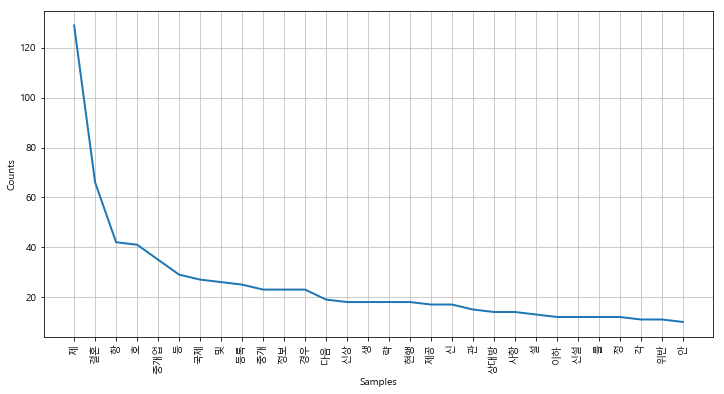

In [237]:
# 시각화
plt.figure( figsize=(12,6) )
# 상위 30개만 노출시켜서 빈도수를 표현한다
ko.plot( 30 )
plt.show()

In [240]:
# 임의로 stopword를 설정하겠다
# stop_words = []

# 한단어를 제거시켜라
ko = list(filter( lambda x: len(x)>1, ko )) # 한단어 제거 후 리스트로 받기
# 실제 의미를 가진 한글자도 같이 제거가 되므로, 조심해야한다
# 첫번쨰 거름

In [242]:
# 필터 조건은 상황에 맞게 구성하여 배제를 하고,
# 상황이 더 복잡하면 => 정규식으로 이동(한방에 해결해야한다)
stop_words = ['.','(',')','%','-','의','을','다','만','로','제','호','및','이','항']
def myFileter(x):
    if len(x)>1: # 한글자 제거
        return True
    else:
        x not in stop_words: # 배제 단어에 없으면 회생, x가 이안에 없으면 참
            return True
        else:# 배제 단어가 포함되어 있으면 제거
            return False

def myFileter2(x):
    # 한글자 이상이거나, 배제 단어에 없으면 포함
    return(len(x)>1 or x not in stop_words)



SyntaxError: invalid syntax (<ipython-input-242-b581f0f53716>, line 8)

In [238]:
ko = list(myFilter, ko)

NameError: name 'myFilter' is not defined

In [243]:
len(ko), ko

(978,
 ['결혼',
  '중개업',
  '관리',
  '법률',
  '일부',
  '개정',
  '법률',
  '한선교',
  '의원',
  '대표',
  '발의',
  '발의',
  '연월일',
  '한선교',
  '손범규',
  '이인기',
  '유성엽',
  '이애주',
  '이한성',
  '안홍준',
  '김태원',
  '안형환',
  '정갑윤',
  '의원',
  '제안',
  '이유',
  '최근',
  '국제',
  '결혼',
  '상당수',
  '국제',
  '결혼',
  '중개',
  '업체',
  '통해',
  '일부',
  '국제',
  '결혼',
  '중개업',
  '이윤',
  '추구',
  '사실',
  '정보',
  '거짓',
  '정보',
  '제공',
  '속성',
  '성사',
  '국제',
  '결혼',
  '상대',
  '외교',
  '마찰',
  '결혼',
  '생활',
  '조기',
  '파탄',
  '야기',
  '발생',
  '국제',
  '결혼',
  '문화',
  '정착',
  '결혼',
  '중개업',
  '피해',
  '사례',
  '최소',
  '위해',
  '국제',
  '결혼',
  '중개업',
  '등록',
  '기준',
  '국제',
  '결혼',
  '중개업',
  '인권',
  '침해',
  '불법',
  '결혼',
  '중개',
  '행위',
  '대한',
  '처벌',
  '규정',
  '또한',
  '국제',
  '결혼',
  '중개업',
  '이용자',
  '상대방',
  '제공',
  '신상',
  '정보',
  '결혼',
  '생활',
  '유지',
  '지장',
  '초래',
  '정신질환',
  '병력',
  '최근',
  '금고',
  '이상',
  '범죄',
  '경력',
  '포함',
  '신상',
  '정보',
  '상대방',
  '언어',
  '번역본',
  '포함',
  '내용',
  '보존',
  '현행법',
  '운영',
  '일부',
  '미비',
  '개선',


In [244]:
stop_words = ['.','(',')','%','-','의','을','다','만','로','제','호','및','이','항']
ko = [ each_word for each_word in ko if each_word not in stop_words ] # 스탑워드에 이치워드가 안되어있으면 다시
ko # 두번쨰 거름

['결혼',
 '중개업',
 '관리',
 '법률',
 '일부',
 '개정',
 '법률',
 '한선교',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '한선교',
 '손범규',
 '이인기',
 '유성엽',
 '이애주',
 '이한성',
 '안홍준',
 '김태원',
 '안형환',
 '정갑윤',
 '의원',
 '제안',
 '이유',
 '최근',
 '국제',
 '결혼',
 '상당수',
 '국제',
 '결혼',
 '중개',
 '업체',
 '통해',
 '일부',
 '국제',
 '결혼',
 '중개업',
 '이윤',
 '추구',
 '사실',
 '정보',
 '거짓',
 '정보',
 '제공',
 '속성',
 '성사',
 '국제',
 '결혼',
 '상대',
 '외교',
 '마찰',
 '결혼',
 '생활',
 '조기',
 '파탄',
 '야기',
 '발생',
 '국제',
 '결혼',
 '문화',
 '정착',
 '결혼',
 '중개업',
 '피해',
 '사례',
 '최소',
 '위해',
 '국제',
 '결혼',
 '중개업',
 '등록',
 '기준',
 '국제',
 '결혼',
 '중개업',
 '인권',
 '침해',
 '불법',
 '결혼',
 '중개',
 '행위',
 '대한',
 '처벌',
 '규정',
 '또한',
 '국제',
 '결혼',
 '중개업',
 '이용자',
 '상대방',
 '제공',
 '신상',
 '정보',
 '결혼',
 '생활',
 '유지',
 '지장',
 '초래',
 '정신질환',
 '병력',
 '최근',
 '금고',
 '이상',
 '범죄',
 '경력',
 '포함',
 '신상',
 '정보',
 '상대방',
 '언어',
 '번역본',
 '포함',
 '내용',
 '보존',
 '현행법',
 '운영',
 '일부',
 '미비',
 '개선',
 '보완',
 '국제',
 '결혼',
 '중개',
 '업체',
 '영업',
 '유도',
 '국제',
 '결혼',
 '가정',
 '생활',
 '안정',
 '사회',
 '정착',
 '것임',
 '내용',
 '국제',
 '결혼',
 

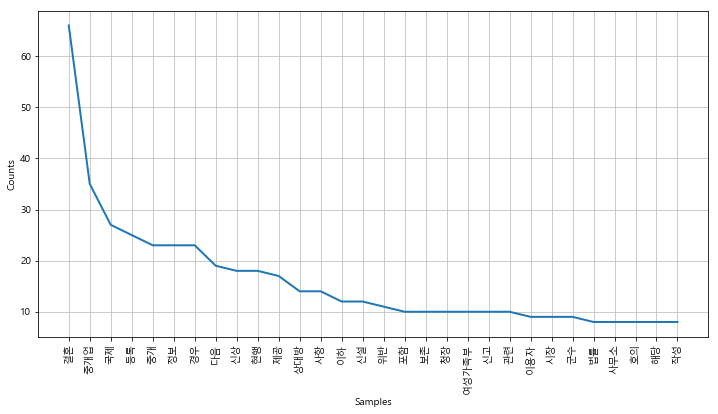

In [245]:
ko = nltk.Text( ko, name='결혼중개업의 관리에 관한 법률 일부개정법률안')
plt.figure( figsize=(12,6) )
ko.plot( 30 )
plt.show()

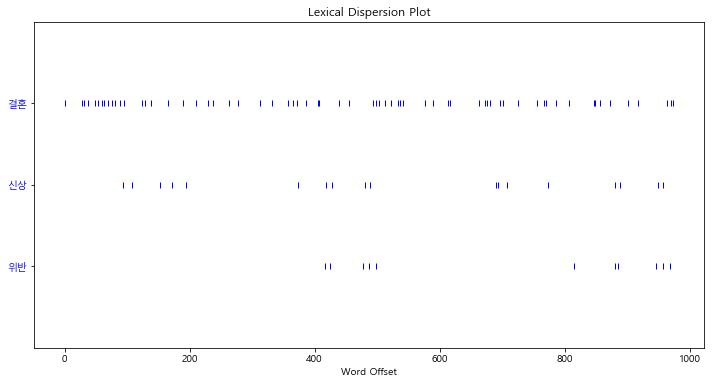

In [246]:
# 특정 단어의 빈도형태와 문장안의 위치를 파악
# 논설위원이나 작가들의 총 데이터를 분석해서 통계적으로 살펴보면, 
# 글의 특성을 예측해 낼 수 있다 -> 글의 지문형태가 나타날 수 있다
plt.figure( figsize=(12,6) )
ko.dispersion_plot( [ '결혼','신상','위반' ] ) 

# 결과: 위반은 100단어 이상썻을때부터 나타나기 시작하고, 다른 글자들은 처음부터 시작되는것을 확인할 수 있다

In [247]:
# 특정 단어의 주변 단어 => 텍스트 주변에 자주 나오는 표현
ko.concordance( '결혼' ) # 하도급의 주변에 나오는 단어들 표현

Displaying 25 of 25 matches:
 결혼 중개업 관리 법률 일부 개정 법률 한선교 의원 대표 발의 발의 연월일
이애주 이한성 안홍준 김태원 안형환 정갑윤 의원 제안 이유 최근 국제 결혼 상당수 국제 결혼 중개 업체 통해 일부 국제 결혼 중개업 이윤 추구 
준 김태원 안형환 정갑윤 의원 제안 이유 최근 국제 결혼 상당수 국제 결혼 중개 업체 통해 일부 국제 결혼 중개업 이윤 추구 사실 정보 거짓 정
안 이유 최근 국제 결혼 상당수 국제 결혼 중개 업체 통해 일부 국제 결혼 중개업 이윤 추구 사실 정보 거짓 정보 제공 속성 성사 국제 결혼 상
제 결혼 중개업 이윤 추구 사실 정보 거짓 정보 제공 속성 성사 국제 결혼 상대 외교 마찰 결혼 생활 조기 파탄 야기 발생 국제 결혼 문화 정착
추구 사실 정보 거짓 정보 제공 속성 성사 국제 결혼 상대 외교 마찰 결혼 생활 조기 파탄 야기 발생 국제 결혼 문화 정착 결혼 중개업 피해 사
성사 국제 결혼 상대 외교 마찰 결혼 생활 조기 파탄 야기 발생 국제 결혼 문화 정착 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 
상대 외교 마찰 결혼 생활 조기 파탄 야기 발생 국제 결혼 문화 정착 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 기준 국제 결혼 
기 발생 국제 결혼 문화 정착 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 기준 국제 결혼 중개업 인권 침해 불법 결혼 중개 행위 
 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 기준 국제 결혼 중개업 인권 침해 불법 결혼 중개 행위 대한 처벌 규정 또한 국제 결
 위해 국제 결혼 중개업 등록 기준 국제 결혼 중개업 인권 침해 불법 결혼 중개 행위 대한 처벌 규정 또한 국제 결혼 중개업 이용자 상대방 제공
혼 중개업 인권 침해 불법 결혼 중개 행위 대한 처벌 규정 또한 국제 결혼 중개업 이용자 상대방 제공 신상 정보 결혼 생활 유지 지장 초래 정신
대한 처벌 규정 또한 국제 결혼 중개업 이용자 상대방 제공 신상 정

In [248]:
# 연어, 비슷한 의미를 내포하게끔 사용된 단어
ko.collocations()

출입국관리 사무소; 이용자 상대방; 성폭력 가정폭력; 성매매 성폭력; 중개업 이용자; 가정폭력 아동학대


In [249]:
data = ko.vocab().most_common( 150 )

In [250]:
wc = WordCloud( relative_scaling=0.2,   # relative_scaling=: 수치 확장
                background_color='white',
                font_path='c:/windows/Fonts/malgun.ttf'
              ).generate_from_frequencies(dict(data))

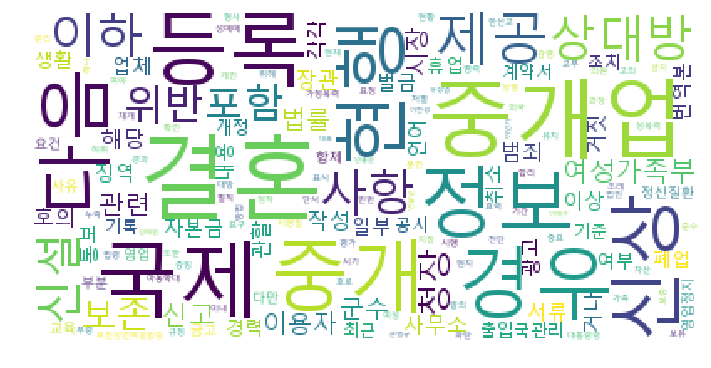

In [251]:
plt.figure(figsize=(12,8))
plt.imshow( wc )
plt.axis('off')
plt.show()